In [1]:
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 639.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.2 MB/s eta 0:00:00


In [120]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch, Sbopen
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

Load EURO 2024 data via the API

In [3]:
#competition_id=55, season_id=282
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

In [4]:
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [111]:
matches = euro_2024_matches["match_id"]

In [7]:
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [8]:
matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,...,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
16,3941017,2024-06-30,19:00:00.000,Europe - UEFA Euro,2024,England,Slovakia,2,1,available,...,2024-07-10T11:31:44.852038,4,Round of 16,VELTINS-Arena,Halil Umut Meler,Gareth Southgate,Francesco Calzona,1.1.0,2,2
38,3930181,2024-06-25,22:00:00.000,Europe - UEFA Euro,2024,England,Slovenia,0,0,available,...,2024-07-10T14:27:59.561474,3,Group Stage,RheinEnergieStadion,Clément Turpin,Gareth Southgate,Matjaž Kek,1.1.0,2,2
6,3930171,2024-06-20,19:00:00.000,Europe - UEFA Euro,2024,Denmark,England,1,1,available,...,2024-07-12T05:19:44.572914,2,Group Stage,Deutsche Bank Park,Artur Manuel Ribeiro Soares Dias,Kasper Hjulmand,Gareth Southgate,1.1.0,2,2
46,3930163,2024-06-16,22:00:00.000,Europe - UEFA Euro,2024,Serbia,England,0,1,available,...,2024-07-14T07:10:41.937955,1,Group Stage,VELTINS-Arena,Daniele Orsato,Dragan Stojković,Gareth Southgate,1.1.0,2,2


In [19]:
match_ids = matches_df["match_id"].to_list()

In [20]:
events = []
for matches in match_ids:
    events_df = sb.events(match_id=matches)
    events.append(events_df)

In [21]:
df_events = pd.concat(events, ignore_index=True)

In [60]:
#separate start and end locations from coordinates
df_events[['x', 'y']] = df_events['location'].apply(pd.Series)
df_events[['pass_end_x', 'pass_end_y']] = df_events['pass_end_location'].apply(pd.Series)
df_events[['carry_end_x', 'carry_end_y']] = df_events['carry_end_location'].apply(pd.Series)

/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/1425718869.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_events[['x', 'y']] = df_events['location'].apply(pd.Series)
/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/1425718869.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_events[['x', 'y']] = df_events['location'].apply(pd.Series)
/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/1425718869.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [33]:
team = "England"

### Look at passes throughout the entire tournament

In [62]:
df_successful_passes = df_events[(df_events.team==team)&(df_events.type=="Pass")&(events_df.pass_outcome.isna())]

In [71]:
df_unsuccessful_passes = df_events[(df_events.team==team)&(df_events.type=="Pass")&(events_df.pass_outcome.notna())]

In [63]:
df_passes["pass_outcome"].unique()

array([nan, 'Incomplete', 'Out', 'Unknown', 'Pass Offside'], dtype=object)

In [64]:
df_successful_passes_aggregated = df_successful_passes.groupby('player').size().reset_index()

In [65]:
df_successful_passes_aggregated

,player,0
0,Bukayo Saka,36
1,Cole Palmer,4
2,Declan Rice,91
3,Harry Kane,24
4,John Stones,81
5,Jordan Pickford,51
6,Jude Bellingham,65
7,Kieran Trippier,42
8,Kobbie Mainoo,48
9,Kyle Walker,74


### Visualise one players' passes

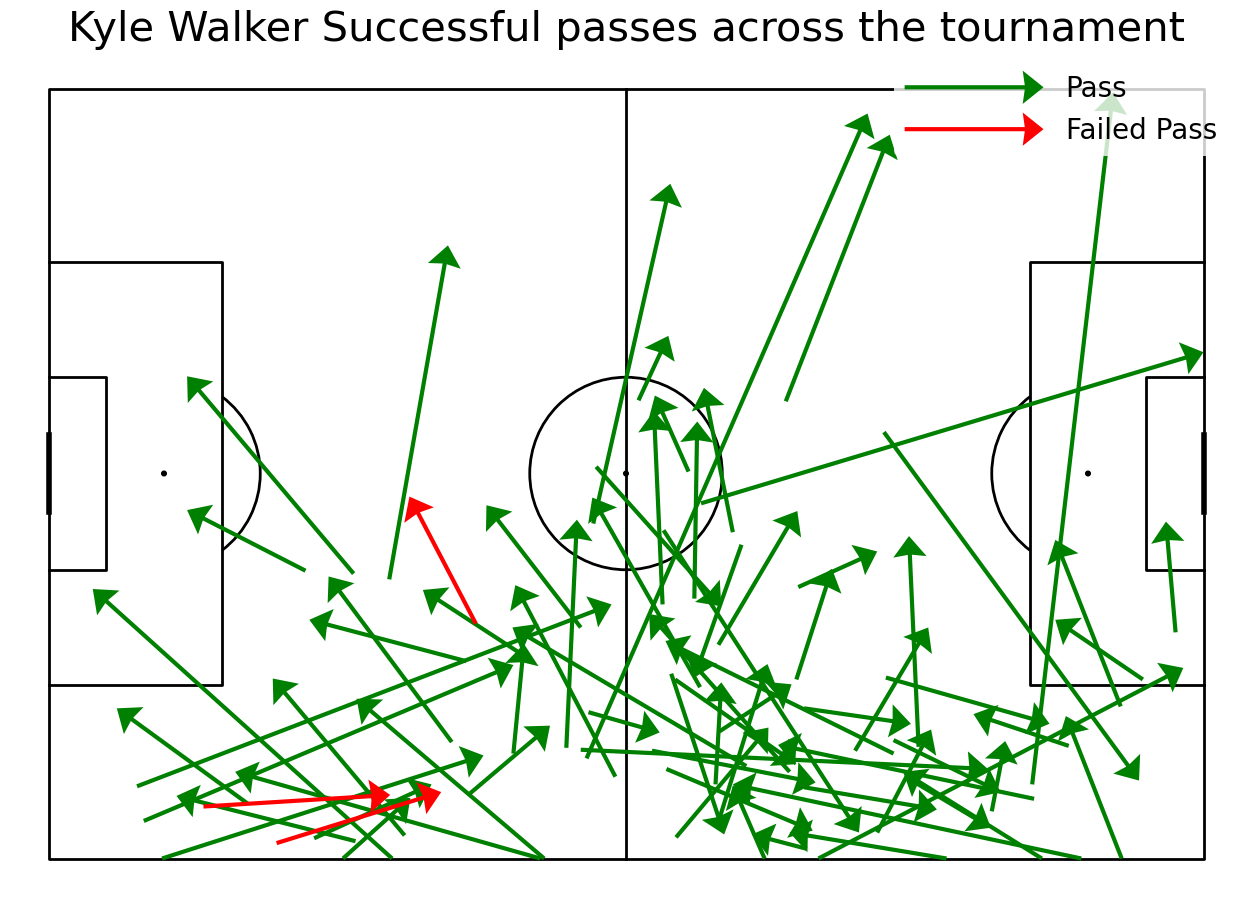

In [75]:
#visualise for a given player
player_name="Kyle Walker"

pass_colour='green'
failed_pass_colour='red'

player_passes=df_successful_passes[(df_successful_passes.player==player_name)]
player_failed_passes = df_unsuccessful_passes[(df_unsuccessful_passes.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the successful passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the unsuccessful passes
pitch.arrows(player_failed_passes.x, player_failed_passes.y,
player_failed_passes.pass_end_x, player_failed_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=failed_pass_colour, ax=ax, zorder=2, label = "Failed Pass")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Successful passes across the tournament', fontsize=30,color='black')

### Plot shot map for one player

In [91]:
# get event data for entire season
comp_events_df=sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [92]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/1r/56nf11_90f52p5v071j9flwr0000gp/T/ipykernel_2520/2447140862.py:2: PerformanceWarning: DataFrame is highly fragmented.  

In [94]:
# get non penalty shots and non penalty goals
shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")&(comp_events_df.shot_outcome=="Goal")]

Our aggregates here will just include shots from england games

In [95]:
#shots
#get count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()

#rename second column
shots_count.rename(columns={shots_count.columns[2]: "np Shots" }, inplace = True)

#goals
#get count for each player, include team info
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()

#rename second column
goals_count.rename(columns={goals_count.columns[2]: "np Goals" }, inplace = True)


#xG
#get count for each player, include team info
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()

#rename second column
xg_sum.rename(columns={xg_sum.columns[2]: "np xG" }, inplace = True)

#round up to 2 decimal places
xg_sum['np xG']=xg_sum['np xG'].round(2)

In [96]:
#combine dataframes
shot_stats=pd.merge(shots_count, goals_count,
                    how="outer", on=["player", "team"])

shot_stats=pd.merge(shot_stats, xg_sum,
                    how="outer", on=["player", "team"])

In [97]:
#add 0 where value is NaN
shot_stats=shot_stats.fillna(0)

#sort to get top goalscorers, change by=' ' to get top xG, or top Shots
shot_stats=shot_stats.sort_values(by='np xG', ascending=False)

In [98]:
shot_stats.head(10)

,player,team,np Shots,np Goals,np xG
109,Harry Kane,England,17,2.0,2.27
154,Kai Havertz,Germany,17,0.0,2.21
56,Cristiano Ronaldo dos Santos Aveiro,Portugal,22,0.0,2.19
206,Memphis Depay,Netherlands,18,1.0,1.95
276,Romelu Lukaku Menama,Belgium,11,0.0,1.75
171,Kylian Mbappé Lottin,France,23,0.0,1.72
173,Lamine Yamal Nasraoui Ebana,Spain,18,1.0,1.59
42,Breel-Donald Embolo,Switzerland,8,2.0,1.57
329,Álvaro Borja Morata Martín,Spain,14,1.0,1.57
53,Christoph Baumgartner,Austria,8,1.0,1.55


In [109]:
#Shot map for top scorer
xg_player=shot_stats.player.iloc[7]

player_goals_df=goals_df[(goals_df.player==xg_player)]

player_shots_df=shots_df[(shots_df.player==xg_player)&(shots_df.shot_outcome!="Goal")]

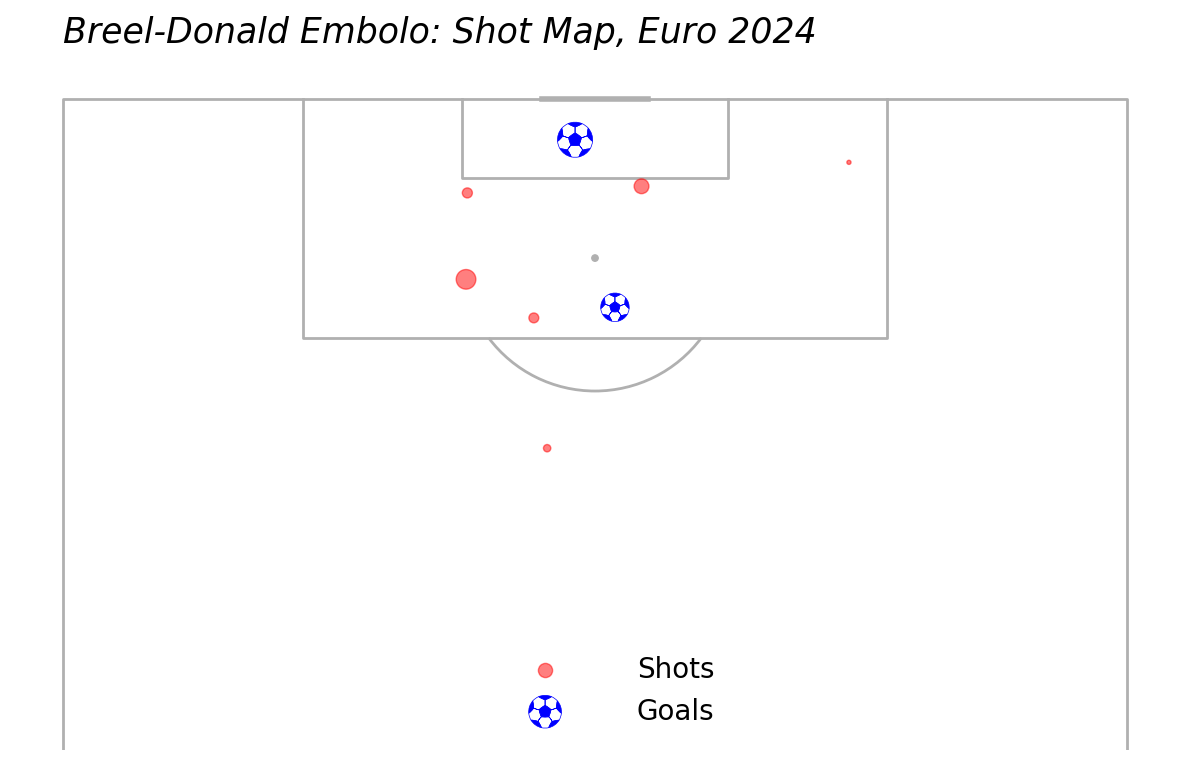

In [110]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='red'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{xg_player}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')

### Create a pass map

The code below is taken from soccermatics: https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

In [225]:
#Choose a specific match to look at



parser = Sbopen()
#df, related, freeze, tactics = parser.event(69301)
df, related, freeze, tactics = parser.event(3943043)


Prepare data: Only use successful passes up until the first substitution

In [173]:
#Here we want to take all data until the first substitution (as this will change the network composition)


#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Spain"].iloc[0]["index"]

#make df with successfull passes by England until the first substitution
mask_england = (df.type_name == 'Pass') & (df.team_name == "Spain") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")

#taking necessary columns
df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]

#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

For each player, we need 
1. average location of passes made and received passes
2. Number of passes made by each player
3. A marker size proportional to the number of passes made

In [174]:
# passx and passy represent the average x,y coordinates from where a player passed the ball
# recx and recy do the same for ball receipts
# 

scatter_df = pd.DataFrame()
# Iterate through all players, taking x and y coordinates of where they passed and received the ball
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()

    #Add info to dataframe: player, avg x, avg y at ball activity (ball passed + received)
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [175]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
9,6.9,39.6,9.1,57.2,Mendibil,Normand
12,8.9,57.2,20.6,75.8,Normand,Ramos
16,28.6,76.4,50.2,68.5,Ramos,Carvajal
27,70.4,73.3,71.0,78.3,Carvajal,Ramos
41,64.5,77.5,56.8,75.5,Carvajal,Cascante
...,...,...,...,...,...,...
1687,3.6,43.5,31.7,26.9,Mendibil,Laporte
1694,32.7,5.1,42.9,4.0,Saseta,Arthuer
1697,42.2,4.5,48.0,62.7,Arthuer,Ebana
1700,41.6,64.4,57.2,75.1,Ebana,Ramos


Here we count combinations of passes between the same two players

In [176]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)


#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

Plot a pitch and use "annotate" function to add in the avg position (x, y) of each player

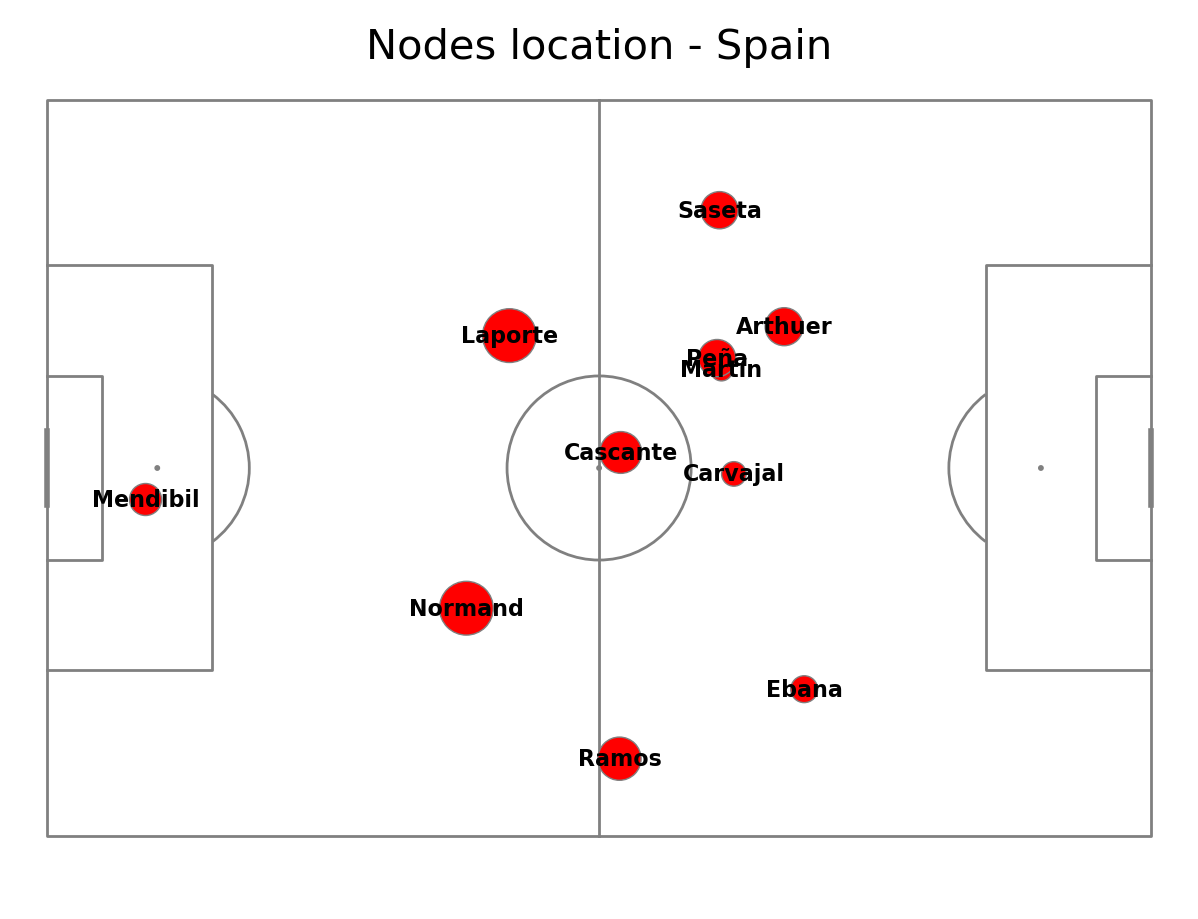

In [177]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Spain", fontsize = 30)
plt.show()

Add edges between nodes. 

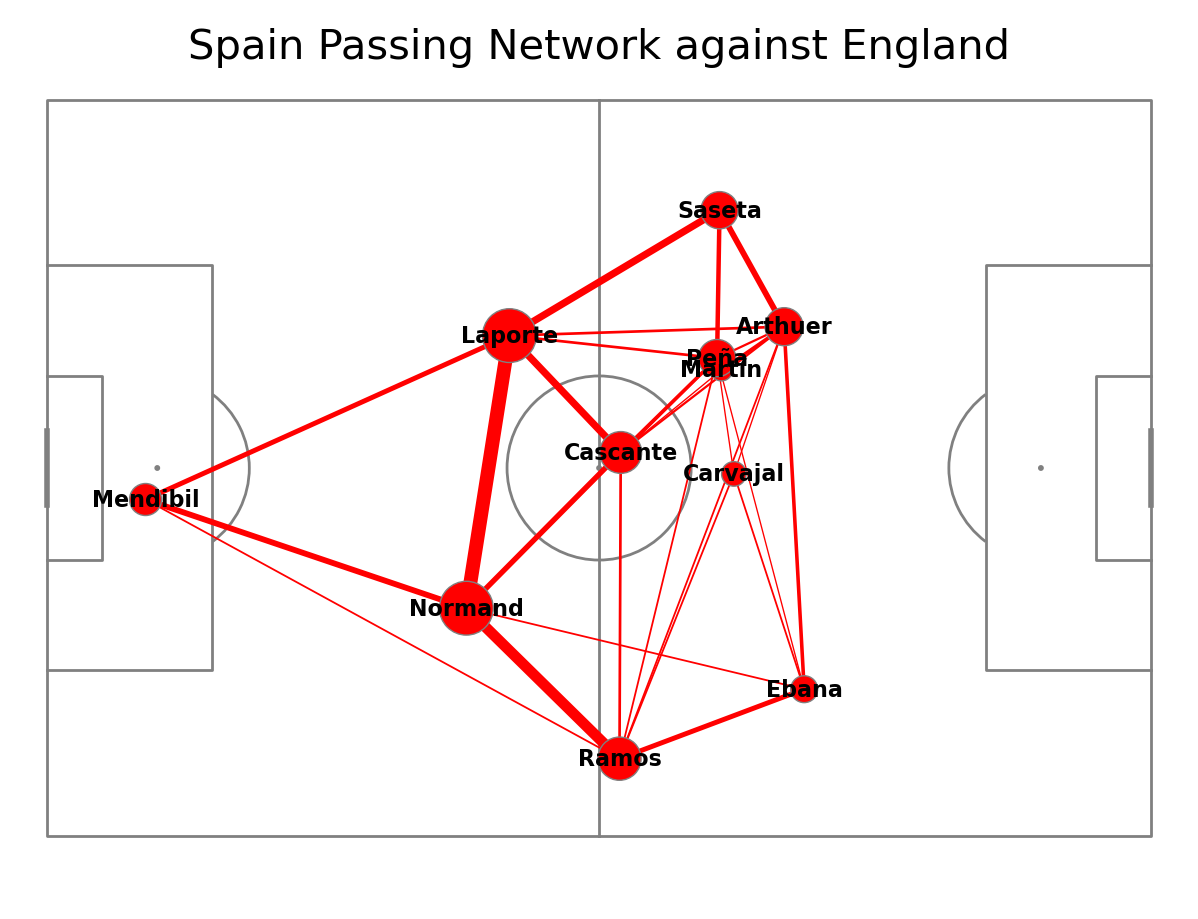

In [178]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Spain Passing Network against England", fontsize = 30)
plt.show()

The centralisation index measures the extend to which play is centred around one player

In [147]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.07


Create a function for passing networks

In [206]:
def create_passing_network(df, team_name, team_against=None):
    sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == team_name].iloc[0]["index"]
    
    #make df with successfull passes by given team until the first substitution
    mask_team = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    
    #taking necessary columns
    df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    
    #adjusting that only the surname of a player is presented.
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
    scatter_df = pd.DataFrame()
    # Iterate through all players, taking x and y coordinates of where they passed and received the ball
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
        recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
        recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    
        #Add info to dataframe: player, avg x, avg y at ball activity (ball passed + received)
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]
    
    #adjust the size of a circle so that the player who made more passes
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)
    #counting passes between players
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    
    
    #setting a treshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]
    #Drawing pitch
    pitch = Pitch(line_color='grey')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    #Scatter the location on the pitch
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    #annotating player name
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    
    fig.suptitle(f"Nodes location - {team_name}", fontsize=30)
    #plot once again pitch and vertices
    pitch = Pitch(line_color='grey')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])
    
    fig.suptitle(f"{team_name} Passing Network against {team_against}", fontsize=30)
    plt.show()

In [224]:
create_passing_network(df, "Spain", "England")

KeyError: 'type_name'

In [215]:
match_list = df_events.match_id.unique().tolist()

In [216]:
match_list

[3943043, 3942819, 3942227, 3941017, 3930181, 3930171, 3930163]

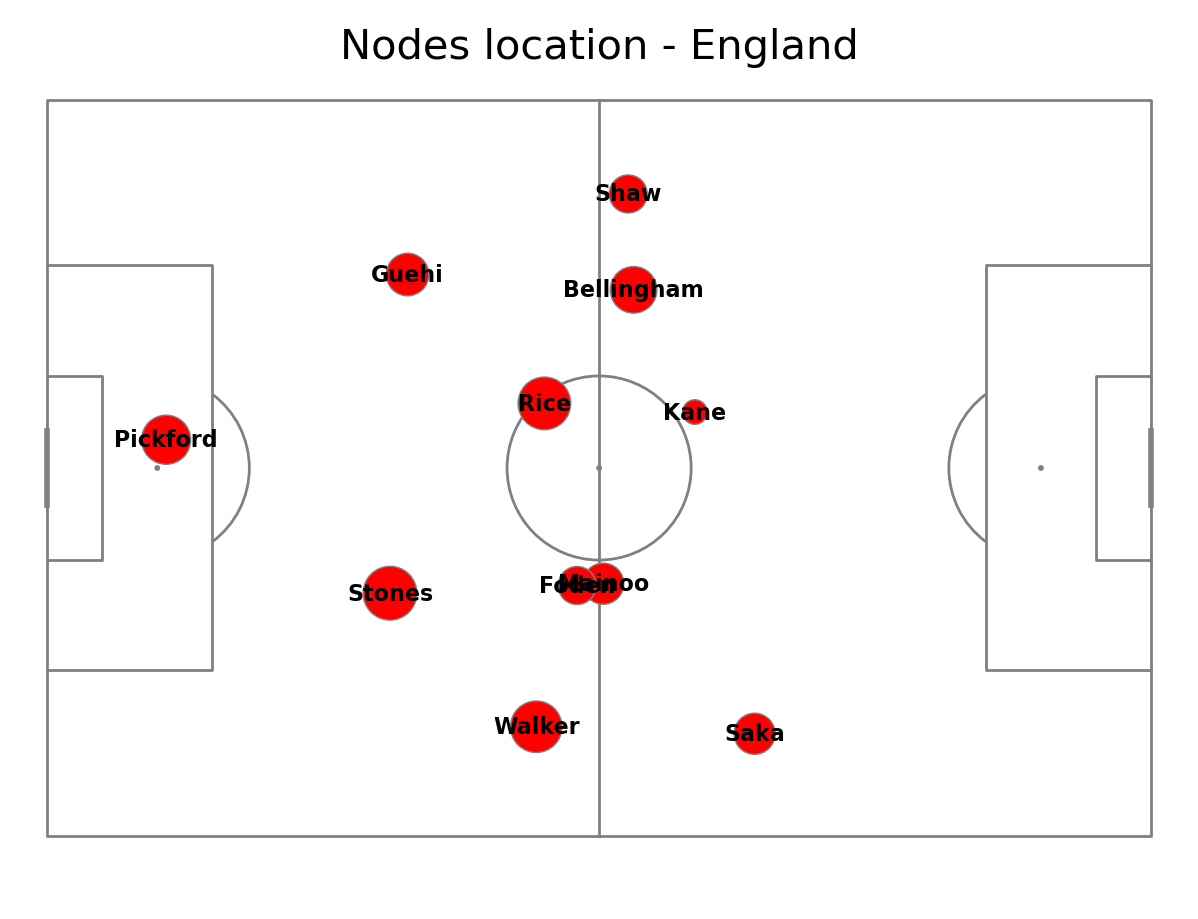

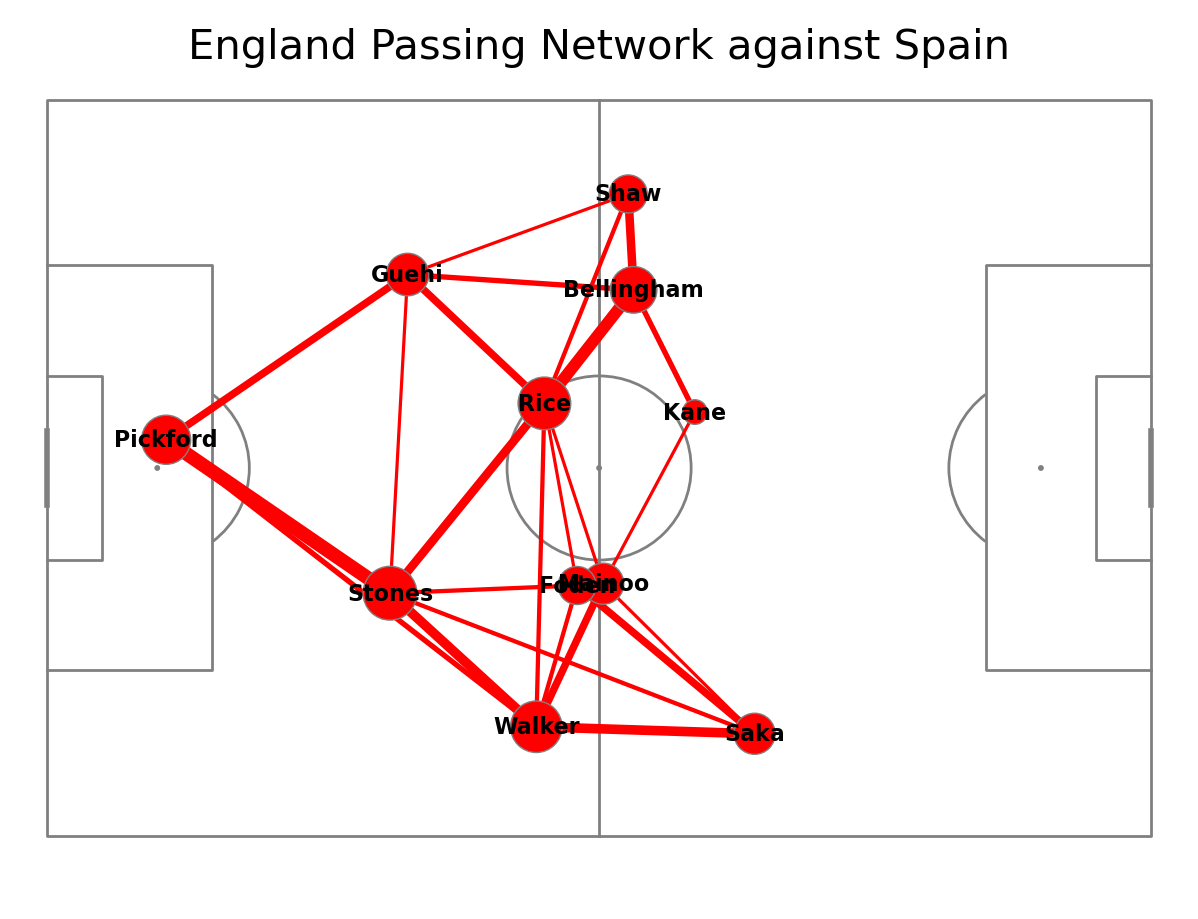

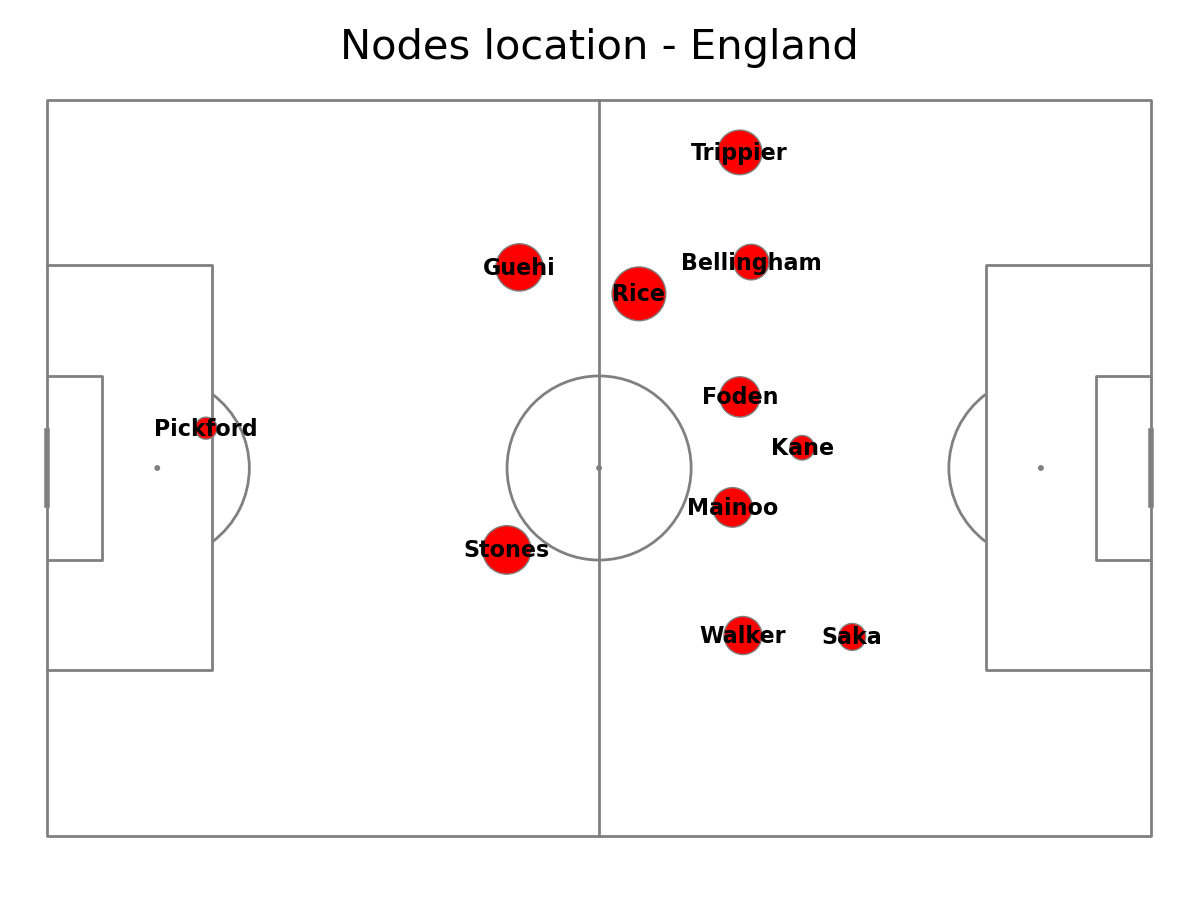

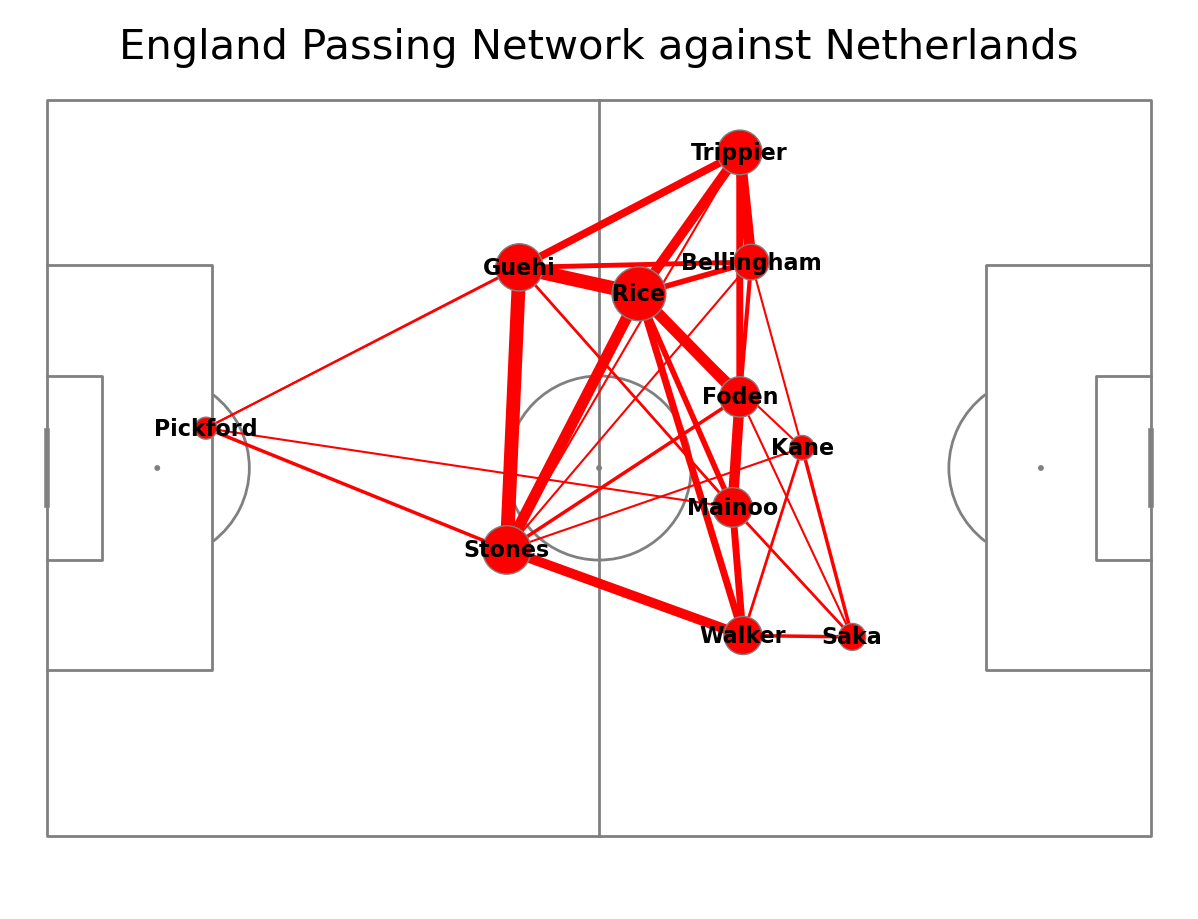

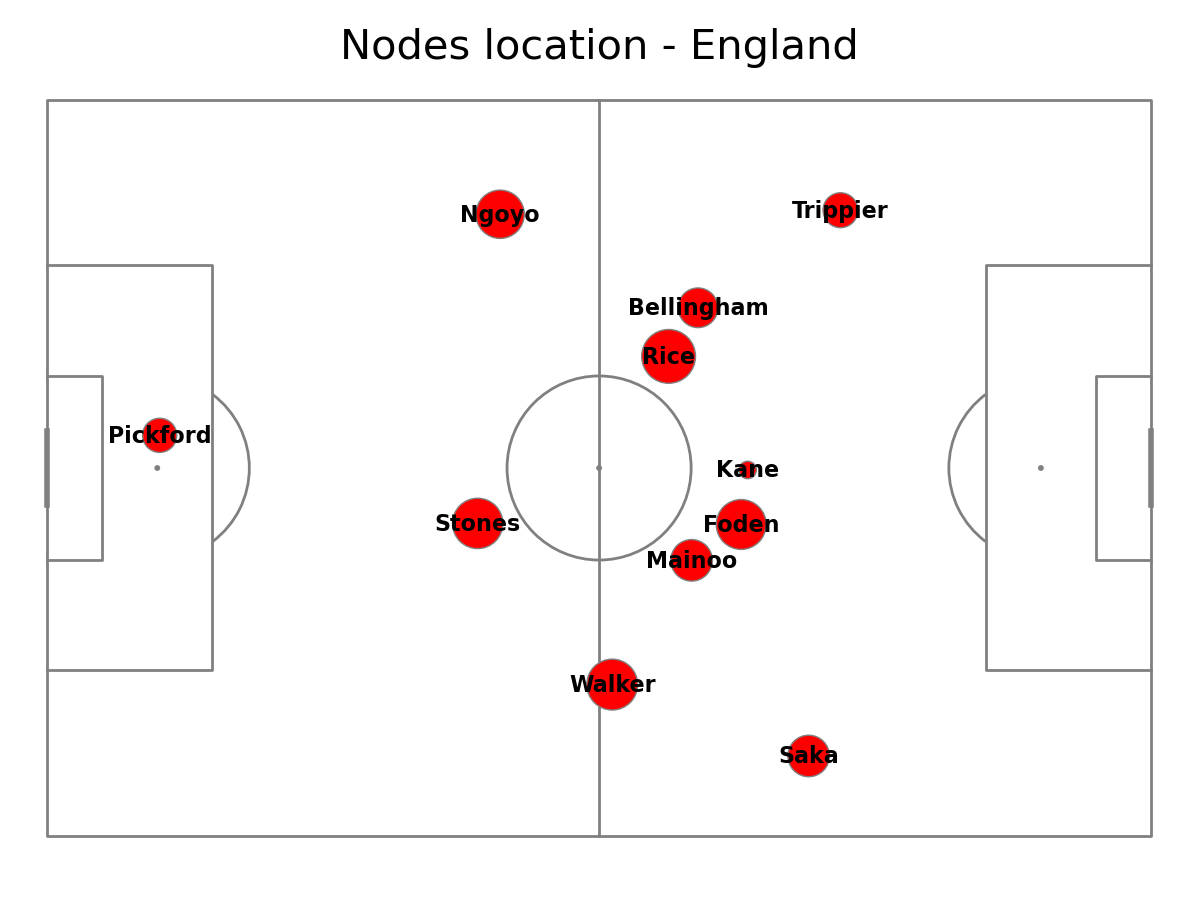

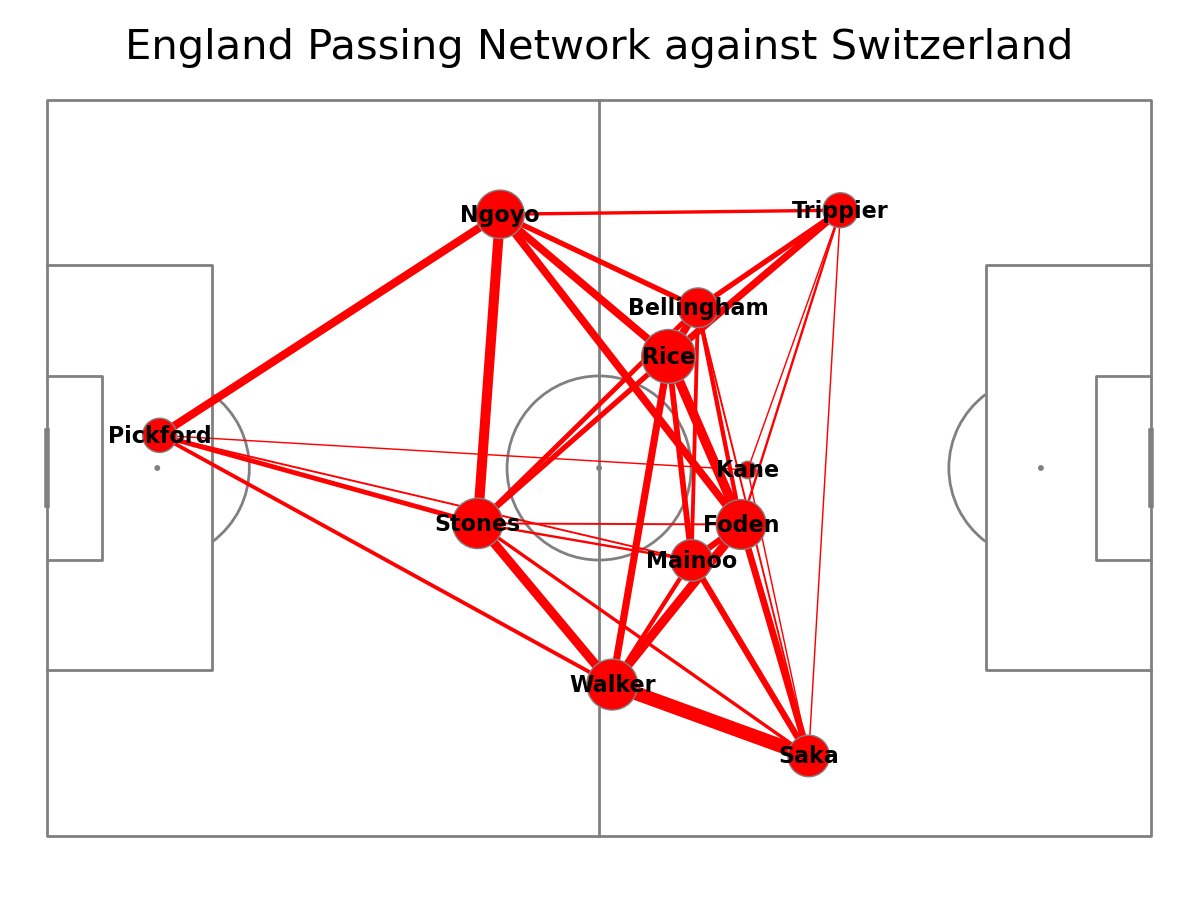

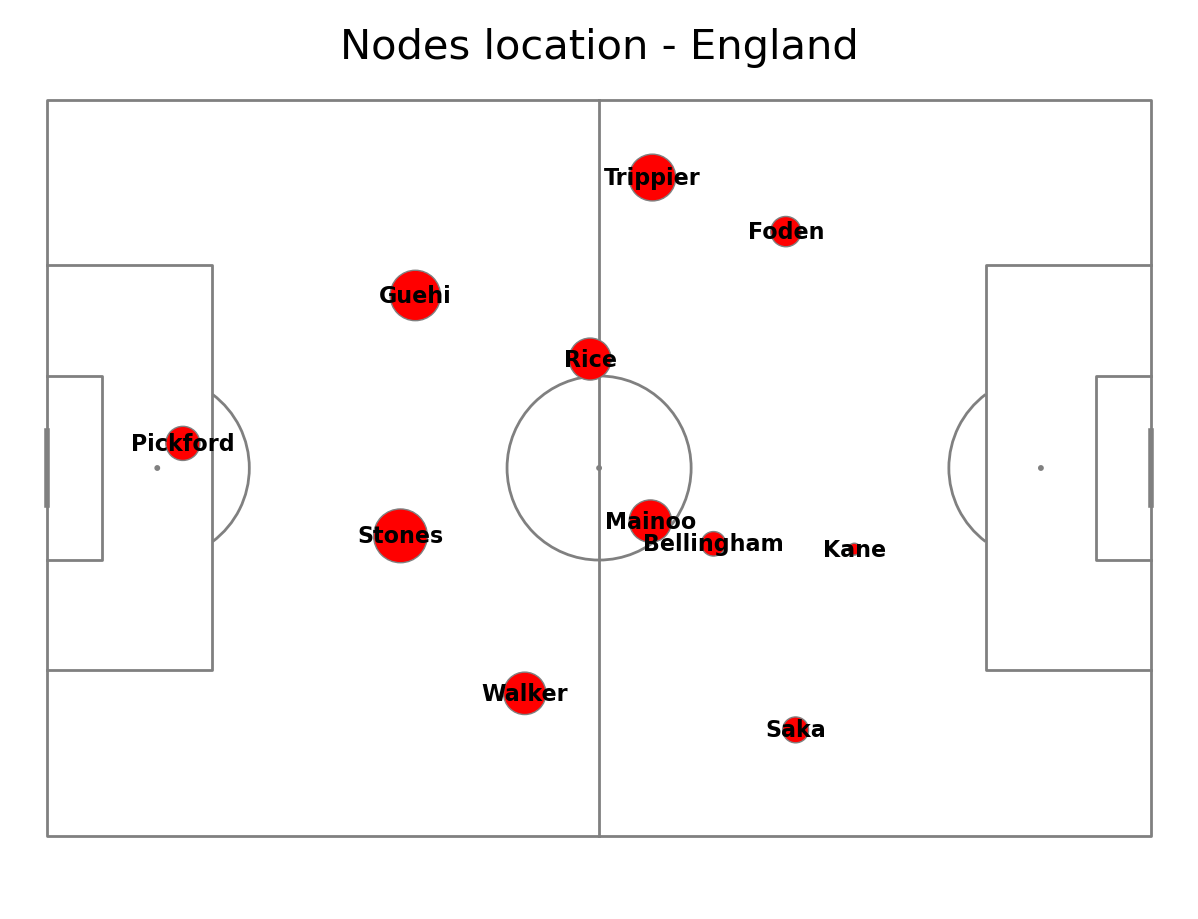

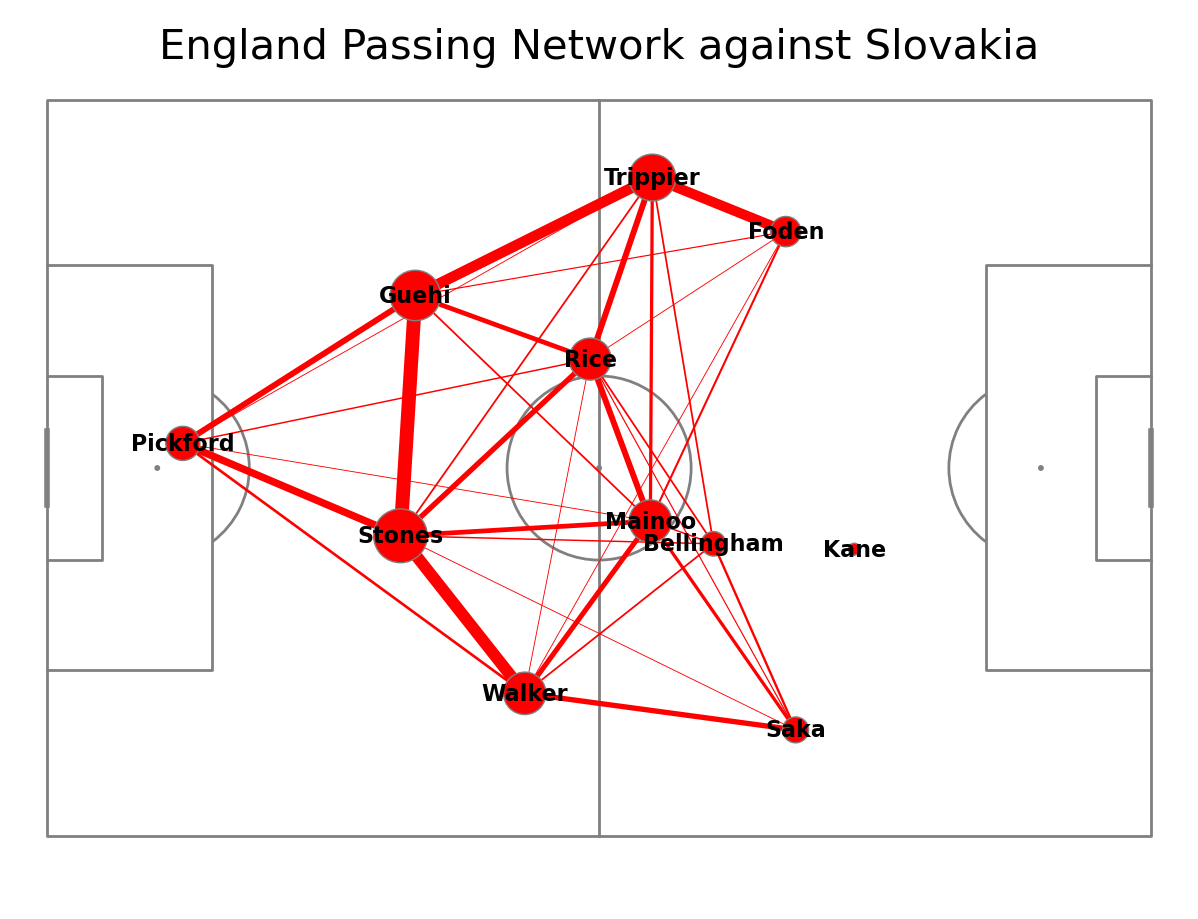

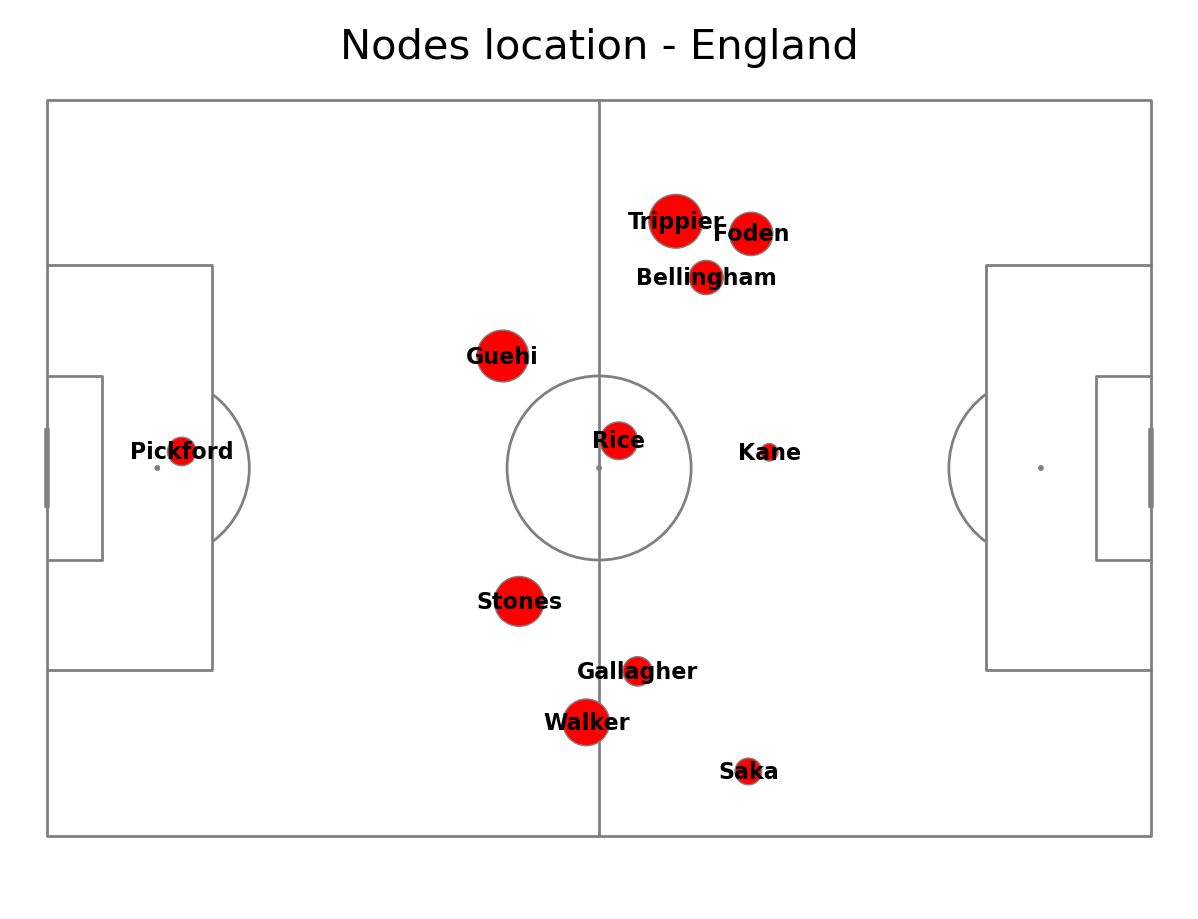

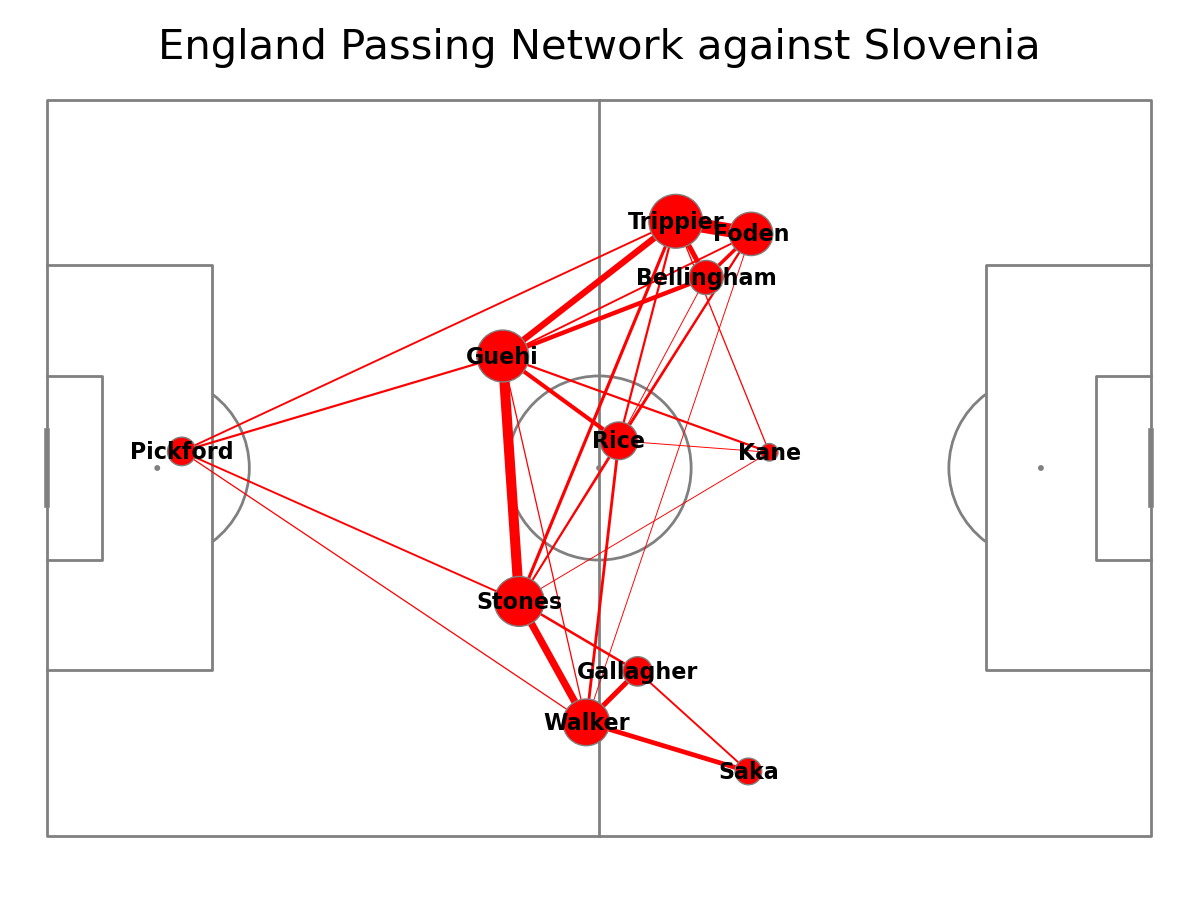

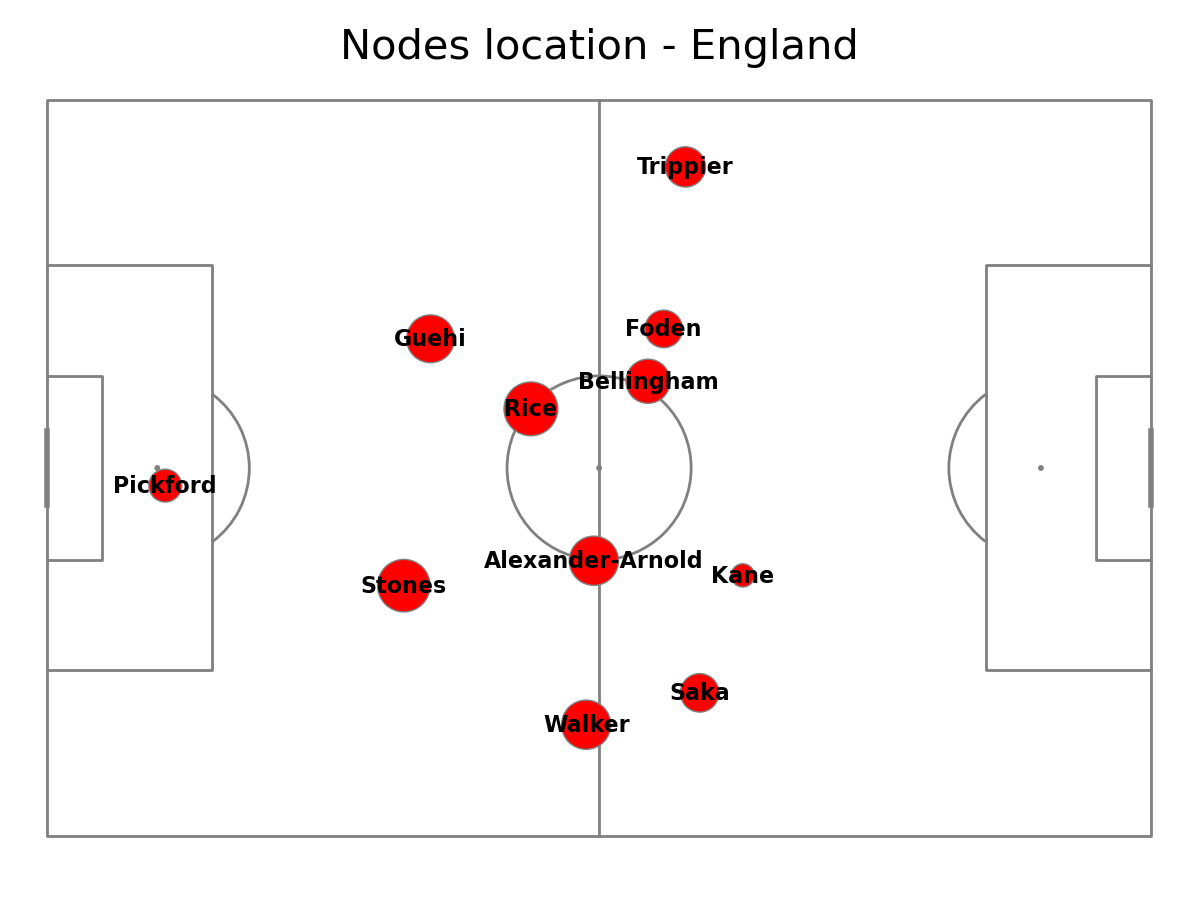

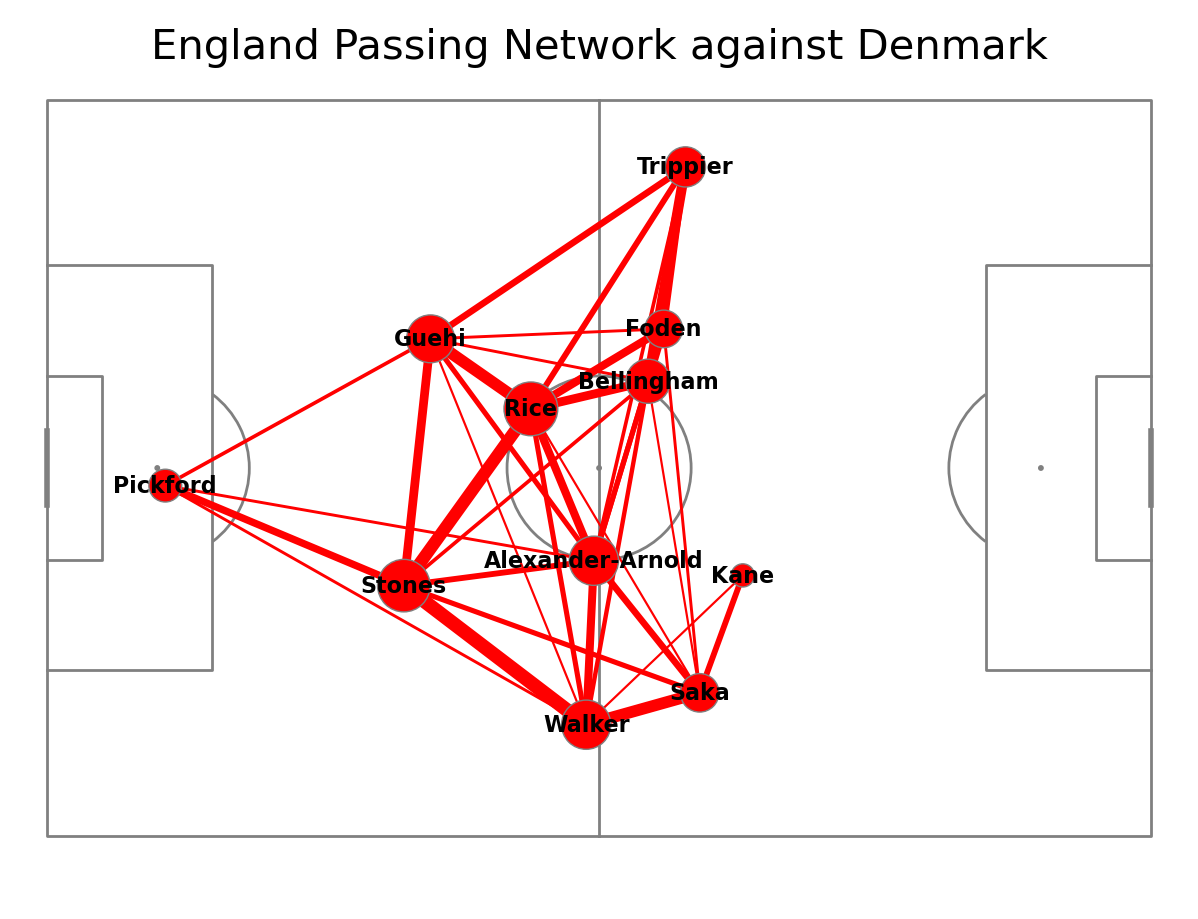

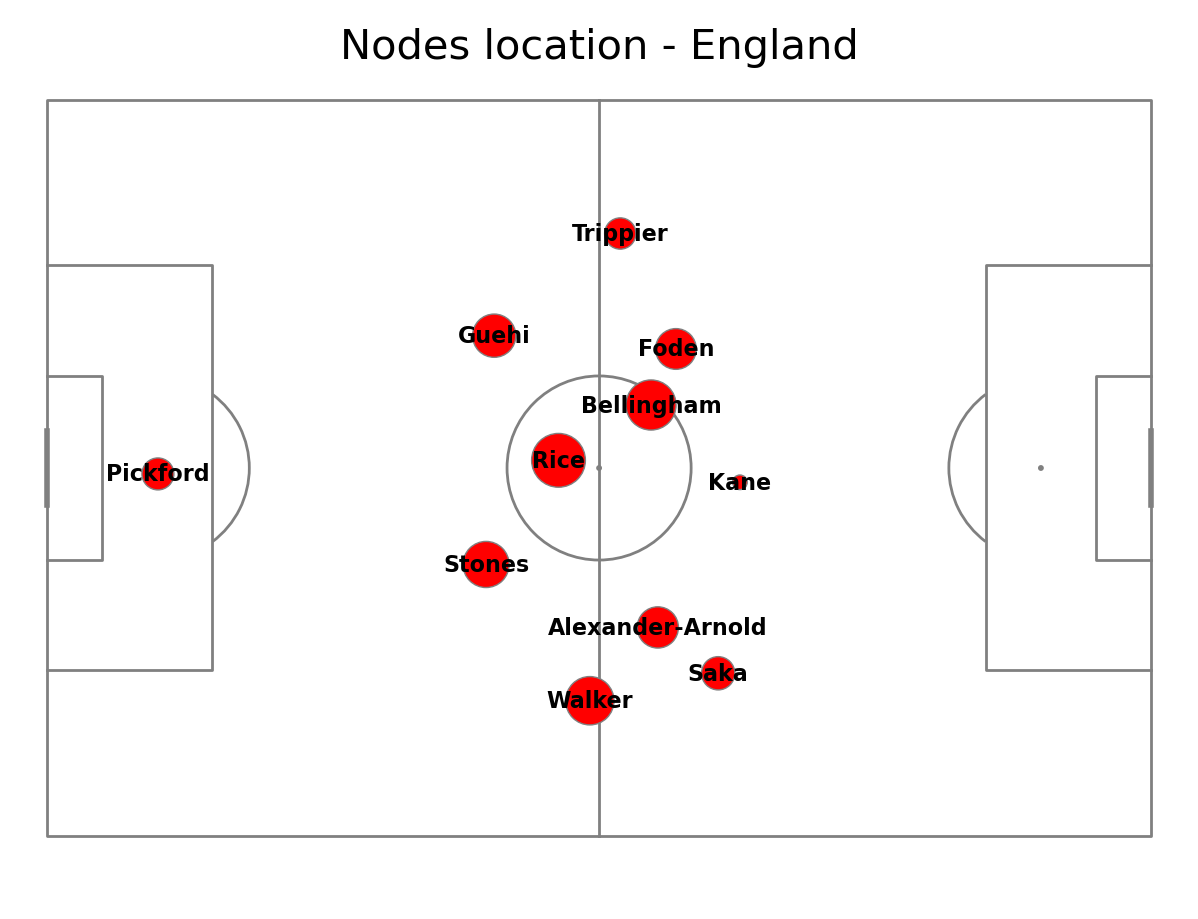

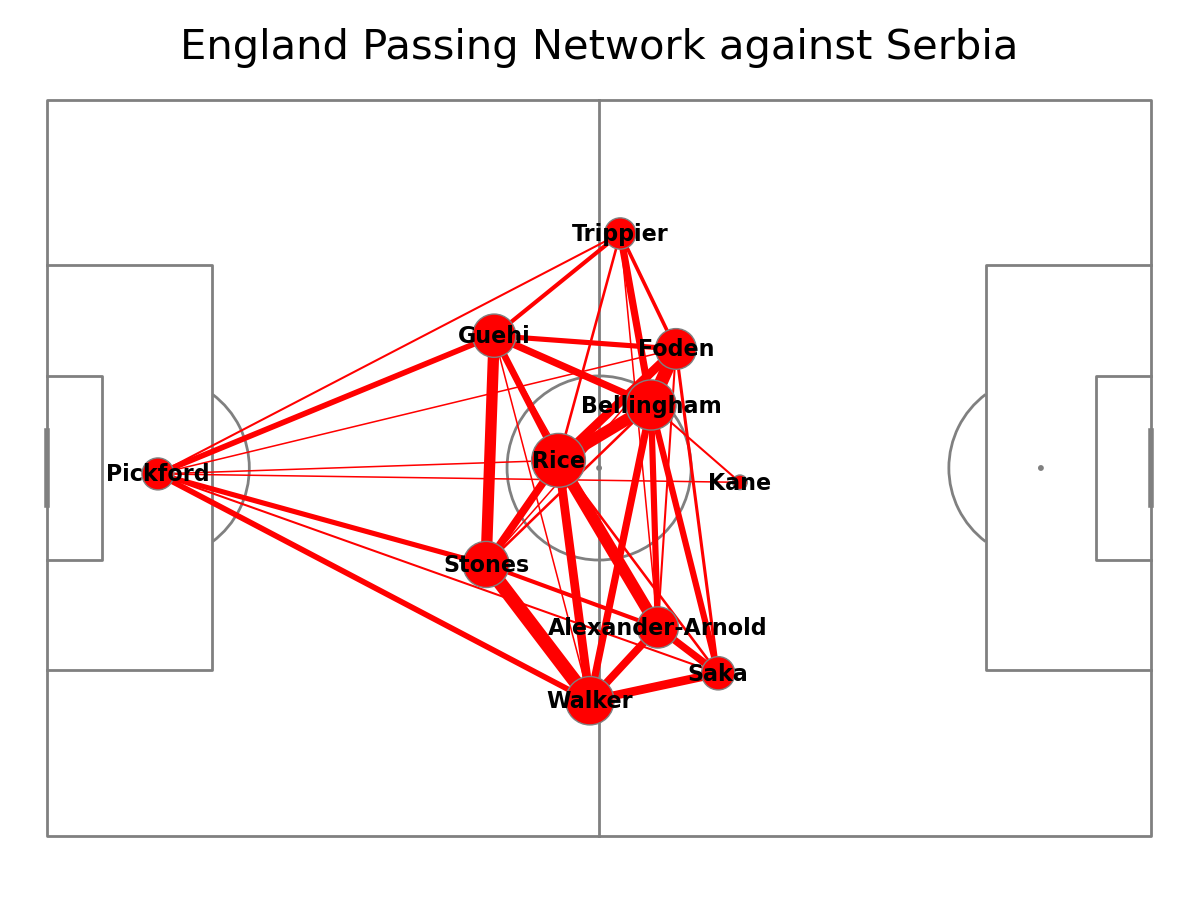

In [231]:
parser = Sbopen()

events_dict = {}

# Iterate through each match ID and populate the dictionary
for match_id in match_list:
    # Fetch events for the current match_id
    df_events, _, _, _ = parser.event(match_id)
    # Store DataFrame in dictionary
    events_dict[match_id] = df_events

# Iterate through the dictionary and run create_passing_network for each match
for match_id, df in events_dict.items():
        # Determine the opponent team name
    teams = list(df['team_name'].unique())
    if 'England' in teams:
        teams.remove('England')
        team_against = teams[0] if teams else None
    create_passing_network(df, "England", team_against)  